# Advance Bank Term Deposit

## Introduction
This notebook provides a detailed analysis of customer behavior and insights into factors influencing term deposit subscription.

## Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('data.csv')

# Preview data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Customer Demographics Analysis

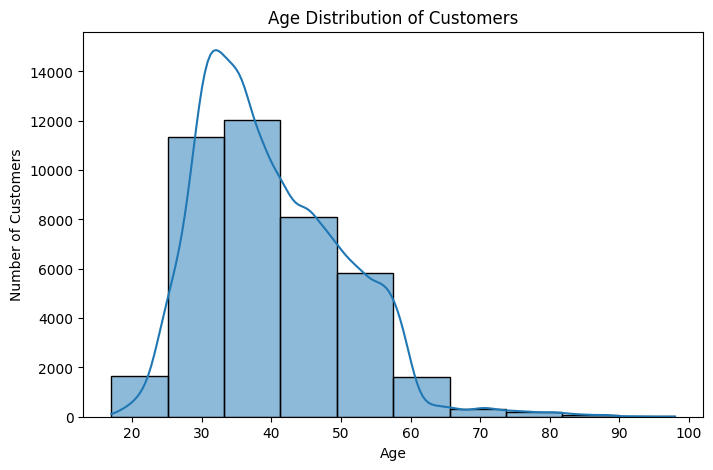

In [3]:
# Age distribution
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure Age is numeric
df["age"] = pd.to_numeric(df["age"], errors="coerce")

# Plot age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["age"].dropna(), bins=10, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()


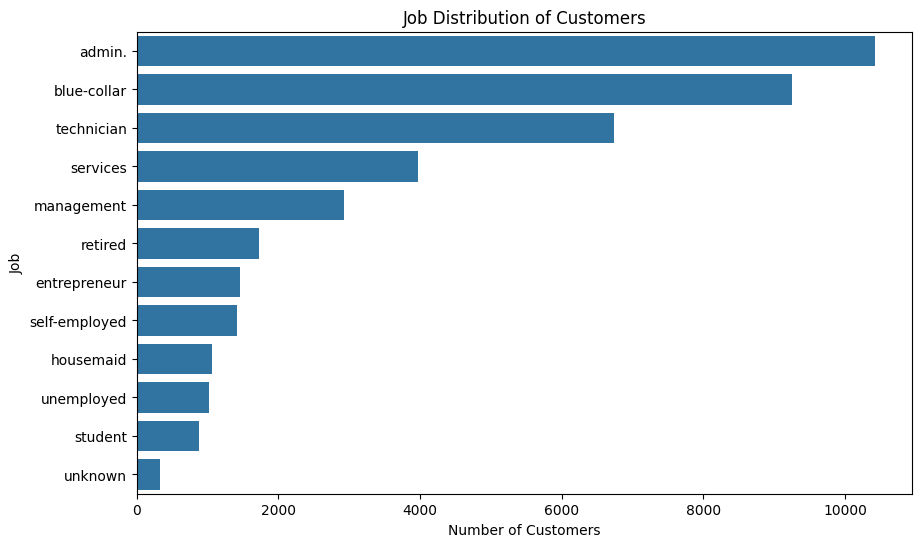

In [5]:
# Job distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    y="job",            # change column name if needed
    order=df["job"].value_counts().index
)

plt.title("Job Distribution of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Job")
plt.show()


## Balance & Deposit Trends

In [13]:
# Average balance by deposit subscription
# Average age by deposit subscription
average_age_by_subscription = df.groupby('y')['age'].mean()
print(average_age_by_subscription)

y
no     39.911185
yes    40.913147
Name: age, dtype: float64


## Campaign Effectiveness

In [14]:
# Contact method analysis
# Average number of contacts for those who subscribed vs not
campaign_effectiveness = df.groupby('y')['campaign'].mean()
print(campaign_effectiveness)

y
no     2.633085
yes    2.051724
Name: campaign, dtype: float64


In [16]:
# Number of contacts vs deposit subscription
# Count of subscriptions (yes/no) for each number of contacts
contacts_vs_subscription = df.groupby('campaign')['y'].value_counts().unstack().fillna(0)

print(contacts_vs_subscription)
# Percentage of subscriptions for each number of contacts
subscription_rate = df.groupby('campaign')['y'].value_counts(normalize=True).unstack().fillna(0)
subscription_rate['yes_rate'] = subscription_rate['yes'] * 100

print(subscription_rate[['yes_rate']])


y              no     yes
campaign                 
1         15342.0  2300.0
2          9359.0  1211.0
3          4767.0   574.0
4          2402.0   249.0
5          1479.0   120.0
6           904.0    75.0
7           591.0    38.0
8           383.0    17.0
9           266.0    17.0
10          213.0    12.0
11          165.0    12.0
12          122.0     3.0
13           88.0     4.0
14           68.0     1.0
15           49.0     2.0
16           51.0     0.0
17           54.0     4.0
18           33.0     0.0
19           26.0     0.0
20           30.0     0.0
21           24.0     0.0
22           17.0     0.0
23           15.0     1.0
24           15.0     0.0
25            8.0     0.0
26            8.0     0.0
27           11.0     0.0
28            8.0     0.0
29           10.0     0.0
30            7.0     0.0
31            7.0     0.0
32            4.0     0.0
33            4.0     0.0
34            3.0     0.0
35            5.0     0.0
37            1.0     0.0
39          

## Correlation Heatmap

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'y_numeric'],
      dtype='object')


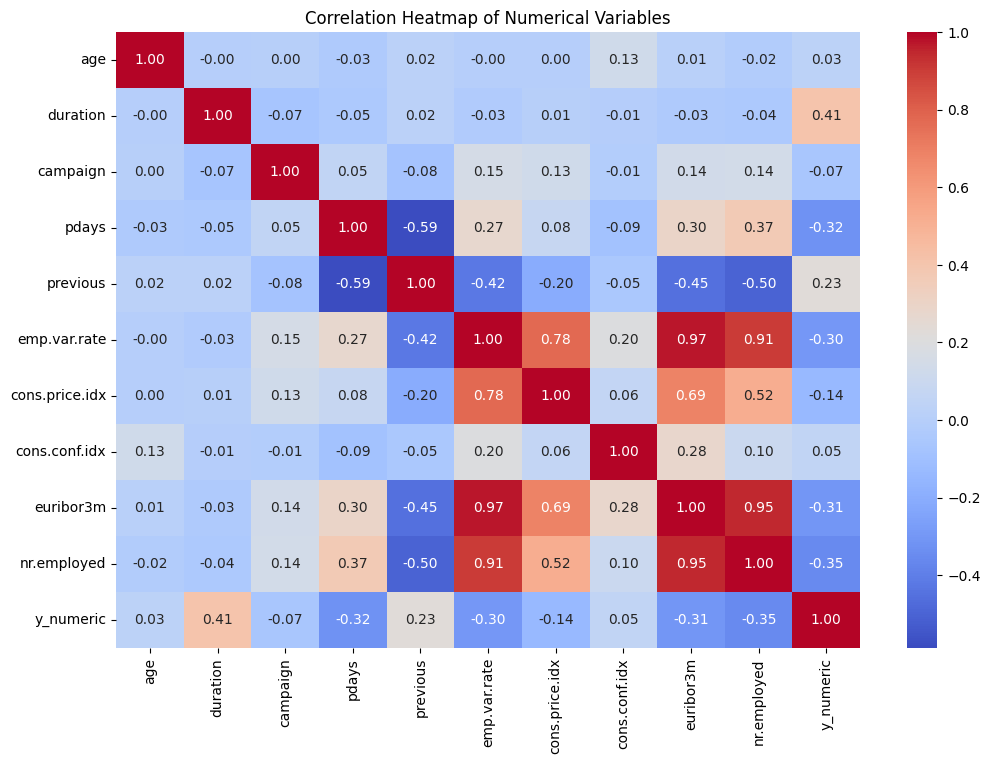

In [20]:
# Correlation of numerical variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'y' to numeric
df['y_numeric'] = df['y'].map({'no': 0, 'yes': 1})

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

# Correlation matrix
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


## Predictive Modeling (Logistic Regression)

In [21]:


# Encode categorical variables
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# List of categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome']

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert target 'y' to numeric
df_encoded['y_numeric'] = df_encoded['y'].map({'no': 0, 'yes': 1})

# Features (drop original 'y' and target column)
X = df_encoded.drop(['y', 'y_numeric'], axis=1)
y = df_encoded['y_numeric']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9115076474872542
Confusion Matrix:
 [[7103  200]
 [ 529  406]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



              Feature  Coefficient
5        emp.var.rate    -2.697518
1            duration     1.206449
6      cons.price.idx     1.205355
8           euribor3m     0.666009
37  contact_telephone    -0.319574
38          month_aug     0.304912
9         nr.employed     0.289237
42          month_mar     0.235295
43          month_may    -0.229184
3               pdays    -0.184797


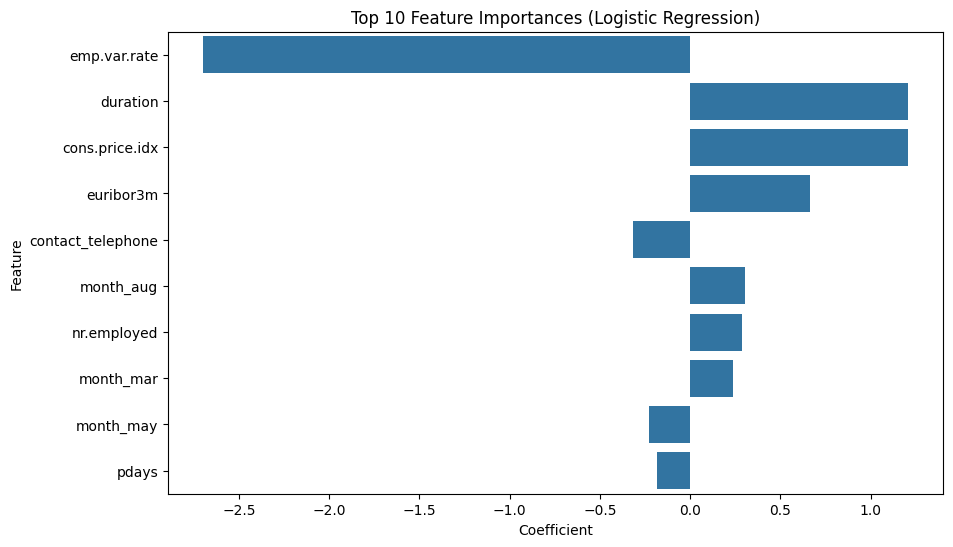

In [22]:
# Feature importance
# Get feature names
feature_names = X.columns

# Get coefficients from the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute importance
feature_importance['abs_coeff'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coeff', ascending=False)

# Show top 10 important features
print(feature_importance[['Feature', 'Coefficient']].head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Feature Importances (Logistic Regression)")
plt.show()


## Key Takeaways
- Certain age groups and job categories are more likely to subscribe.
- Higher balances correlate with higher subscription rates.
- Cellular contact is more effective than telephone.
- Campaign duration and number of contacts influence outcomes.
- Logistic regression shows which features are strongest predictors.